In [1]:
from IPython.display import Image
from IPython.core.display import HTML

# Aprendizaje Supervisado: clasificando mediante el uso de KNN

## ¿Qué es KNN?

Compara la distancia de la instancia de consulta con las muestras de entramiento y seleccionado los K vecinos más cercanos (de ahí su nombre).
Luego, toma la mayoría de estas clases de vecinos K para ser la predicción de la instancia de consulta.

La siguiente imagen resume esto muy bien. 

- Si k=3, los tres vecinos más cercanos del círculo son los dos cuadrados y el triángulo. Según la regla simple de la mayoría, el círculo se clasifica como cuadrado. 

- Si k=5m, entonces los cinco vecinos más cercanos son los dos cuadrados y los tres triángulos. Por tanto el círculo se clasifica como triángulo.

In [2]:
Image(url="https://learning.oreilly.com/library/view/python-machine-learning/9781119545637/images/c09f001.jpg")

Por tanto, la clasificación de un punto depende de la mayoría de sus vecinos.

### Nota
KNN también se usa a veces para regresión además de clasificación. Por ejemplo, se puede utilizar para calcular el promedio del objetivo numérico de los K vecinos más cercanos. Nos centraremos en el de clasificación. 

## Implementación en python

In [3]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt 

Trazaremos los puntos utilizando seaborn:

In [32]:
data

,x,y,c
0,1,1,A
1,2,2,A
2,4,3,B
3,3,3,A
4,3,5,B
5,5,6,B
6,5,4,B


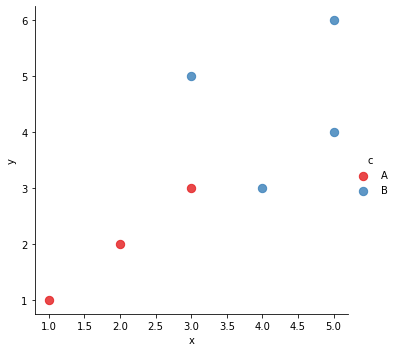

In [5]:
data = pd.read_csv("knn.csv")
sns.lmplot('x', 'y', data=data,
           hue='c', palette='Set1',
           fit_reg=False, scatter_kws={"s": 70})
plt.show() 

La siguiente imagen muestra la distribución de los distintos puntos:
- Los puntos que pertenecen a la clase A se muestran en rojo.
- Los que pertenecen a la clase en azul.

### Calculando la distancia entre puntos

Para encontrar al vecino más cercano de un punto dado, se debe calcular la distancia euclidiana entre los dos puntos.

En geometría, el espacio euclidiano abarca el plano euclidiano bidimensional, el espacio tridimensional de la geometría y espacios similares de dimensión superior.

Dados dos puntos p=($p_1, p_2, ..., p_n$) y q=($q_1, q_2, ..., q_n$), la distancia entre p y q viene dada por la siguiente fórmula:

\begin{equation*}
\sqrt{((q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2)}
\end{equation*}

Según esta fórmula, podemos definir una función denominada `euclidean_distance` de la siguiente manera:

In [9]:
#---calcula la distancia entre dos puntos---
def euclidean_distance(pt1, pt2, dimension):
    distance = 0
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x])
    return np.sqrt(distance) 

La función `euclidean_distance` puede encontrar la distancia entre dos puntos en cualquier dimensión.
Para este ejemplo, los puntos con los que estamos tratando están en 2D.

## Implementando KNN

A continuación, se define una función denominada `knn()`, que incluye los puntos de entrenamiento, el punto de prueba y el valor de k:

In [150]:
#---Nuestro propio modelo KNN---
def knn(training_points, test_point, k):
    distances = {}
 
    #---Número de ejes con los que tratamos---
    dimension = test_point.shape[1]
 
    #-calcula la distancia euclídea entre cada
    # punto en los datos de train y los datos test
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x],
                                  dimension)
        #---guarda la distancia para cada uno de los puntos---
        distances[x] = dist[0]
 
    #---ordena las distancias---
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    
    #---para almacenar los vecinos---
    neighbors = []
 
    #---extrae los top k vecinos---
    for x in range(k):
        neighbors.append(sorted_d[x][0])
 
    #---para cada uno de los vecinos encontrados, encuentra su clase---
    class_counter = {}
    for x in range(len(neighbors)):
        #---find out the class for that particular point---
        cls = training_points.iloc[neighbors[x]][-1]
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls] = 1
 
    #---ordena class_counter descendentemente---
    sorted_counter = sorted(class_counter.items(),
                            key=operator.itemgetter(1),
                            reverse=True)

    #---devuelve una clase con los de mayor conteo,
    # tantos como vecinos encuentre---
    return(sorted_counter[0][0], neighbors) 

La función devuelve la clase a la que pertenece un punto de prueba, así como los índices de todos los k vecinos más cercanos.

## Haciendo predicciones

Con la función `knn()` definida, ahora podemos hacer algunas predicciones:

In [52]:
data

,x,y,c
0,1,1,A
1,2,2,A
2,4,3,B
3,3,3,A
4,3,5,B
5,5,6,B
6,5,4,B


In [81]:
test_set = [[1,5]]

In [82]:
test = pd.DataFrame(test_set)

In [89]:
cls,neighbors = knn(data, test, 3)

In [90]:
print("Predicted Class: " + cls)

Predicted Class: A


### Visualización de diferentes valores de K

El siguiente fragmento dibuja una serie de círculos concéntricos alrededor del punto de prueba según los valores de k, que van de 7 a 1, con intervalos de -2:

k =  7
Class B
Neighbors
   x  y  c
4  3  5  B
3  3  3  A
1  2  2  A
2  4  3  B
0  1  1  A
5  5  6  B
6  5  4  B
k =  5
Class A
Neighbors
   x  y  c
4  3  5  B
3  3  3  A
1  2  2  A
2  4  3  B
0  1  1  A
k =  3
Class A
Neighbors
   x  y  c
4  3  5  B
3  3  3  A
1  2  2  A
k =  1
Class B
Neighbors
   x  y  c
4  3  5  B


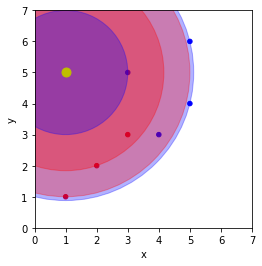

In [91]:
#---generate the color map for the scatter plot---
#---if column 'c' is A, then use Red, else use Blue---
colors = ['r' if i == 'A' else 'b'  for i in data['c']]
ax = data.plot(kind='scatter', x='x', y='y', c = colors)
plt.xlim(0,7)
plt.ylim(0,7)
 
#---plot the test point---
plt.plot(test_set[0][0],test_set[0][1], "yo", markersize='9')
 
for k in range(7,0,-2):
    cls,neighbors = knn(data, test, k)

    print("============")
    print("k = ", k)
    print("Class", cls)
    print("Neighbors")
    print(data.iloc[neighbors])
 
    furthest_point = data.iloc[neighbors].tail(1)
 
    #---draw a circle connecting the test point
    # and the furthest point---
    radius = euclidean_distance(test, furthest_point.iloc[0], 2)
 
    #---display the circle in red if classification is A,
    # else display circle in blue---
    c = 'r' if cls=='A' else 'b'
    circle = plt.Circle((test_set[0][0], test_set[0][1]),
                        radius, color=c, alpha=0.3)
    ax.add_patch(circle)
 
plt.gca().set_aspect('equal', adjustable='box')
plt.show() 

Se muestran una serie de círculos centrados alrededor del punto de prueba, con valores variables de k.

## Uso de la clase ```KNeighborsClassifier``` de Scikit-Learn para KNN

Ahora vamos a la implementación que hace sklearn utilizando el conjunto de datos Iris:

Este conjunto de datos contiene 50 muestras de cada una de tres especies de Iris: Iris setosa, Iris virginica e Iris versicolor, para cada una de estas especies se midieron cuatro rasgos de cada muestra: 
- la longitud y el ancho del sépalos y pétalos.

Los sépalos son los que envuelven a las otras piezas florales en las primeras fases de desarrollo, cuando la flor es solo un capullo, por su parte los pétalos son la parte inferior del perianto y comprende las partes estériles de una flor.

In [155]:
Image(url="https://live.staticflickr.com/7872/40110698543_23f5e6c0ef_m.jpg")

In [170]:
iris = datasets.load_iris()
import pandas as pd
print(iris.data[100],iris.target_names[iris.target[100]])

[6.3 3.3 6.  2.5] virginica


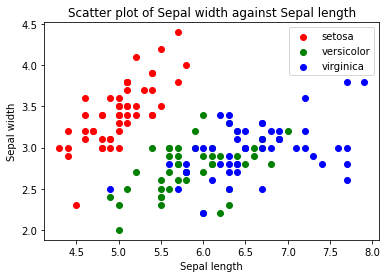

In [171]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn import svm, datasets
import matplotlib.pyplot as plt
 

 
X = iris.data[:, :2]       #  take the first two features
y = iris.target
 
#---plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
 
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show() 

Trazado del ancho del sépalo contra la longitud del sépalo en un diagrama de dispersión.

### Explorando diferentes valores de K

Vamos a usar la clase `KNeighborsClassifier` de Scikit-Learn para ayudarnos a entrenar un modelo en el conjunto de datos de Iris usando KNN. Para empezar, usaremos una k=1:

(array([0, 1, 2]), array([50, 51, 49], dtype=int64))


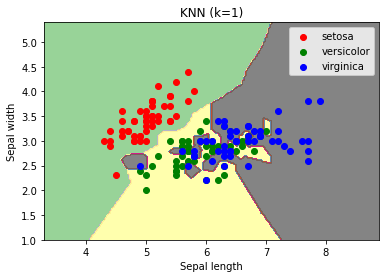

In [172]:
from sklearn.neighbors import KNeighborsClassifier
 
def knn(k):
    #---instanciamos el modelo de aprendizaje---
    knn = KNeighborsClassifier(n_neighbors=k)

    #---ajustamos el modelo---
    knn.fit(X, y)

    #---min y max para la primera feature---
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    #---min y max para la segunda feature---
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #---tamaño del paso en la malla---
    h = (x_max / x_min)/100

    #---hacer predicciones para cada punto en xx,yy---
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    #---dibujar el resultado utilizando un color plot---
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

    #---plot los puntos de training---
    colors = ['red', 'green', 'blue']
    for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'KNN (k={k})')
    plt.legend(loc='best', shadow=False, scatterpoints=1)

    predictions = knn.predict(X)
    
    return predictions


#--clasificaciones basadas en predicciones K=1---
print(np.unique(knn(1), return_counts=True)) 

El fragmento de código anterior crea una meshgrid (una rejilla rectangular de valores) de puntos dispersados a través de los ejes x e y ejes. Luego, cada punto se usa para la predicción y el resultado se dibuja usando un diagrama de color.
Muestra el límite de clasificación utilizando una k=1, es decir hace una predicción basándose solo en el vecino más cercano. Esto hace que su predicción sea muy sensible a todo tipo de distorsiones, como valores atípicos, etiquetado incorrecto, etc. En general, establecer k=1 generalmente conduce a un sobreajuste (overfitting), y como resultado, su predicción generalmente no es muy precisa.

#### Nota
1. El sobreajuste (overfitting) significa que el modelo entrenado se ajusta demasiado bien a los datos de entrenamiento. Esto sucede cuando todos los ruidos y fluctuaciones en los datos de entrenamiento se recogen durante el propio proceso de entrenamiento. En términos generales, esto significa que el modelo se está esforzando mucho para ajustar todos los datos a la perfección. 

    El problema clave con un modelo sobreajustado es que no funcionará bien con los datos nuevos que no se hayan tenido en cuenta.

2. El desajuste (underfitting) ocurre cuando un modelo de aprendizaje automático no puede capturar con precisión la tendencia subyacente de los datos. Específicamente, el modelo no se ajusta lo suficientemente bien a los datos.

Ejemplos:

In [173]:
Image(url="https://learning.oreilly.com/library/view/python-machine-learning/9781119545637/images/c09f006.jpg")

Para KNN, establecer k en un valor alto tiende a hacer que la predicción sea más sólida frente a ruidos en los datos.

Utilizando el mimso fragmento de código anterior, varíemos los valores de k:

(array([0, 1, 2]), array([50, 67, 33], dtype=int64))


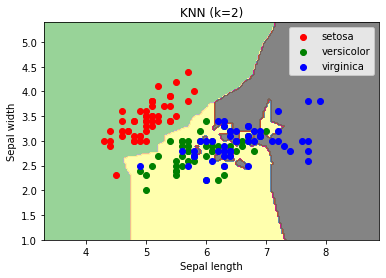

In [174]:
print(np.unique(knn(2), return_counts=True))

(array([0, 1, 2]), array([50, 44, 56], dtype=int64))

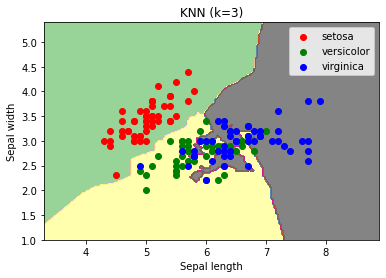

In [175]:
#--clasificaciones basadas en predicciones K=3---
np.unique(knn(3), return_counts=True)

(array([0, 1, 2]), array([49, 62, 39], dtype=int64))


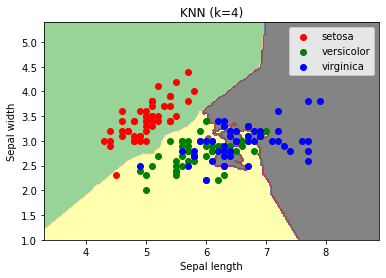

In [176]:
#--clasificaciones basadas en predicciones K=4---
print(np.unique(knn(4), return_counts=True)) 

A medida que aumenta k, el límite se vuelve más suave pero también significa que más puntos se clasificarán incorrectamente. 

Cuando K aumenta a un valor grande se produce un desajuste.

Entonces, la clave es: ¿Cómo determinar el valor K perfecto?

## Validación cruzada

Consiste en dividir los conjuntos de train y test en N subconjuntos

La siguiente imagen muestra un conjunto de datos divididos en cinco pliegues (bloques). Para la primera ejecución, los bloques 1,2,3,4 se utilizarán par entrenar el modelo.

El bloque 0 se utilizará para probar el modelo. 

En la siguiente ejecución:

- Bloques: 0,2,3,4 se utilizarán para entrenamiento
- Bloque: 1 se utilizará para las pruebas

Y así sucesivamente.

In [163]:
Image(url="https://learning.oreilly.com/library/view/python-machine-learning/9781119545637/images/c09f008.jpg")

Al final de cada ejecución se puntúa el modelo. Al final de las carreras k, se promedia la puntuación. Este puntuaje promedio nos dará una buena indicación de qué tan bien funciona nuestro algoritmo.

#### Nota
``El propósito de la validación cruzada no es entrenar al modelo, sino más bien verificarlo.``
La validación cruzada es útil cuando se necesita comparar diferentes algoritmos de aprendizaje autómatico para ver cómo funcionan con el conjunto de datos dado. Una vez que se selecciona el algoritmo, utilizará todos los datos para entrenar el modelo.

### Parámetro - Tuning K

Vamos a entrar el modelo utilizando las 4 características y al mismo tiempo utilizaremos la validación cruzada en el conjunto de datos usando 10 pliegues, de tal forma que haremos esto para valor K:

In [164]:
from sklearn.model_selection import cross_val_score
 
#---mantiene las puntuaciones cross validation(cv)---
cv_scores = []
 
#---utiliza todas las características---
X = iris.data[:, :4]
y = iris.target
 
#---número de pliegues---
folds = 10
 
#---creando una lista impar de K para KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds))))
 
#---Elimina los múltiplos de 3---
ks = [k for k in ks if k % 3 != 0]
 
#---realizar una validación cruzada de k-fold---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
 
    #---realiza una validación cruzada y devuelve la precisión media---
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean) 

1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.9400000000000001
46 0.9333333333333333
47 0.9333333333333333
49 0.9400000000000001
50 0.9266666666666667
52 0.9333333333333333
53 0.9333333333333333
55 0.9333333333333333
56 0.9066666666666666
58 0.9133333333333334
59 0.9200000000000002
61 0.9199999999999999
62 0.9066666666666666
64 0.9
65 0.9
67 0.8866666666666667
68 0.8800000000000001
70 0.8866666666666667
71 0.8866666666666667
73 0.893

La biblioteca Scikit-learn proporciona la función ```cross_val_score()```que realiza la validación cruzada automáticamente y devuelve las métricas que desea (por ejemplo, precisión).

Cuando utilice la validación cruzada, tenga en cuenta que en cualquier momento habrá:
\begin{equation*}
\frac{(pliegues - 1)}{pliegues} * total\_rows
\end{equation*}

Esto se debe a que 
\begin{equation*}
\frac{1}{pliegues} * total\_rows
\end{equation*}
se utilizará para las pruebas.

Para KNN, hay tres reglas que se deben cumplir:

- El valor de k no puede exceder el número de filas para el entrenamiento.

- El valor de k debe ser un número impar (para evitar situaciones en las que haya un empate entre las clases) para un problema de dos clases.

- El valor de k no debe ser múltiplo del número de clases (para evitar empates, similar al punto anterior).

Por lo tanto, la $k_s$ lista del fragmento de código anterior contendrá los siguientes valores:

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134] 

Después del entrenamiento, ```cv_scores``` contendrá una lista de precisiones basada en los diferentes valores de k:

  1    0.96

...

134    0.5533333333333333 

### Encontrar la K óptima
Para encontrar el k óptimo, simplemente encuentre el valor de K que le dé la mayor precisión.

En este caso querrémos encontra el menor ```misclassification error``` (MSE).

El siguiente código busca el MSE para cada k y luego encuentra el k con el MSE más bajo. Luego traza un gráfico de líneas de MSE contra k:

The optimal number of neighbors is 13


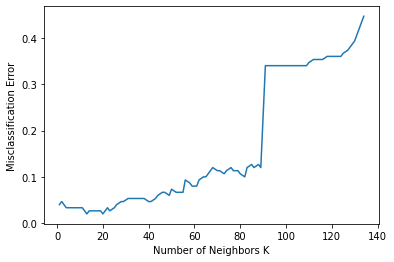

In [165]:
#---calculate misclassification error for each k---
MSE = [1 - x for x in cv_scores]
 
#---determining best k (min. MSE)---
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")
 
#---plot misclassification error vs k---
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show() 

Nos dice esto:
```The optimal number of neighbors is 13```

Vamos a ejecutar el KNN con k=13:

(array([0, 1, 2]), array([51, 46, 53], dtype=int64))


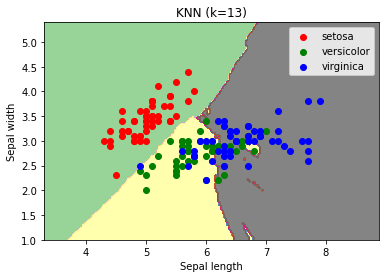

In [177]:
print(np.unique(knn(13), return_counts=True)) 